<a href="https://colab.research.google.com/github/newstage75/python_data_analysis_100knock/blob/main/%E7%AC%AC4%E7%AB%A0/%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%91%E9%A1%A7%E5%AE%A2%E3%81%AE%E8%A1%8C%E5%8B%95%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/データサイエンス/20240505python実践データ分析100本ノック/実習用Myフォルダ/第４章')

In [3]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

,0
log_id,0
customer_id,0
usedate,0


In [4]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


In [5]:
customer_clustering = customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# データの標準化（平均値を0、標準偏差を1に変換）
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

# K-meansクラスタリングを適用し、データを4つのクラスタに分割
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering = customer_clustering.assign(cluseter = clusters.labels_)

print(customer_clustering["cluseter"].unique())
customer_clustering.head()

[2 1 0 3]


,mean,median,max,min,membership_period,cluseter
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


In [7]:
# カラム名の変更
customer_clustering.columns = ["月内平均値", "月内中央値", "月内最大値", "月内最小値", "会員期間", "cluster"]
customer_clustering.groupby("cluster").count() # データの件数を取る（各クラスターの顧客数）

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [8]:
# 各グループの特徴をつかむべく、平均値を取得
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.541974,5.392804,8.757871,2.704648,14.857571
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,4.677561,4.670937,7.233787,2.153723,36.915933
3,8.064079,8.050716,10.014320,6.180191,7.016706


上記を見ると
- cluster 0  
 会員期間も、月平均も比較的平均的？
- cluster 1  
 会員期間は短めで、月利用も少ない
- cluster 2  
 会員期間が長め（月平均は少なめ）
- cluster 3  
 会員期間が短いが、月平均利用は多い



In [9]:
# クラスタリングの結果を可視化する。
# 5つの変数を二次元上にプロットする場合、次元削減を行う。
# 次元削減の代表的な手法である「主成分分析」を用いる
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

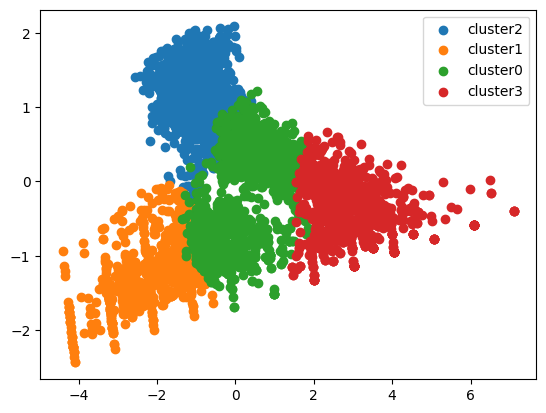

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1], label="cluster"+str(i))

# グラフ上の各プロットが何を表しているかを示す説明を表示
# scatter内のlabelで指定したものが表示される。
plt.legend()
# グラフの表示
plt.show()